## **Visualizing the Result of Quezon Province Partition Referendum**

The Philippines, with its archipelagic geography, employs a multifaceted administrative system with regions, provinces, cities, municipalities, and barangays. The partition of provinces, or the creation of new provinces from existing ones, is a recurring topic driven by complex factors, and is mostly done through a plebiscite, as required by law.

In this country, partition of provinces have mostly been successful, with factors mostly for representation and self-government purposes, spurring of development; however, there are also notable defeats and failures, due to many factors, but not limited to: political gerrymandering, further division and lag in socio-economic development, and regionalism.

However, referendums usually have low voter turnouts. There is a reason, though. Unlike general elections, referendums are not held on a fixed date and only concern specific jurisdictions, thus, holidays and mechanisms to provide time for voters of the affected jurisdictions are not enforced and referendums will proceed as usual.

Out of many referendums regarding creation of new provinces, only three have resulted into failures, notable examples are Isabela in 1995, Quezon in 2008, and Palawan recently in 2021.

In Quezon province alone, there were two partitioning-related referendums: first in 1979, when the voters of then-subprovince of Aurora (subprovince but still part of Quezon from 1951) successfully chose to officially break away from the mother province, and the referendum in 2008, which failed with slight majority.

This project will focus on the failed 2008 referendum to partition Quezon into two provinces. Through data visualization, we will examine the voting patterns and potential underlying factors that contributed to the referendum's outcome.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.colors import ListedColormap
import seaborn as sns
import geopandas as gpd
from matplotlib.ticker import FuncFormatter

from figure_labeler import *
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

# Load the font to be used
plt.rcParams['font.family'] = 'Gotham'

#### Reading municipal-level maps

In [2]:
gdf_2 = gpd.read_file(r"C:\Users\Ebo\DS162\Data-Vis\GeoPandas_Folder\Data\level_2\gadm41_PHL_2.json")

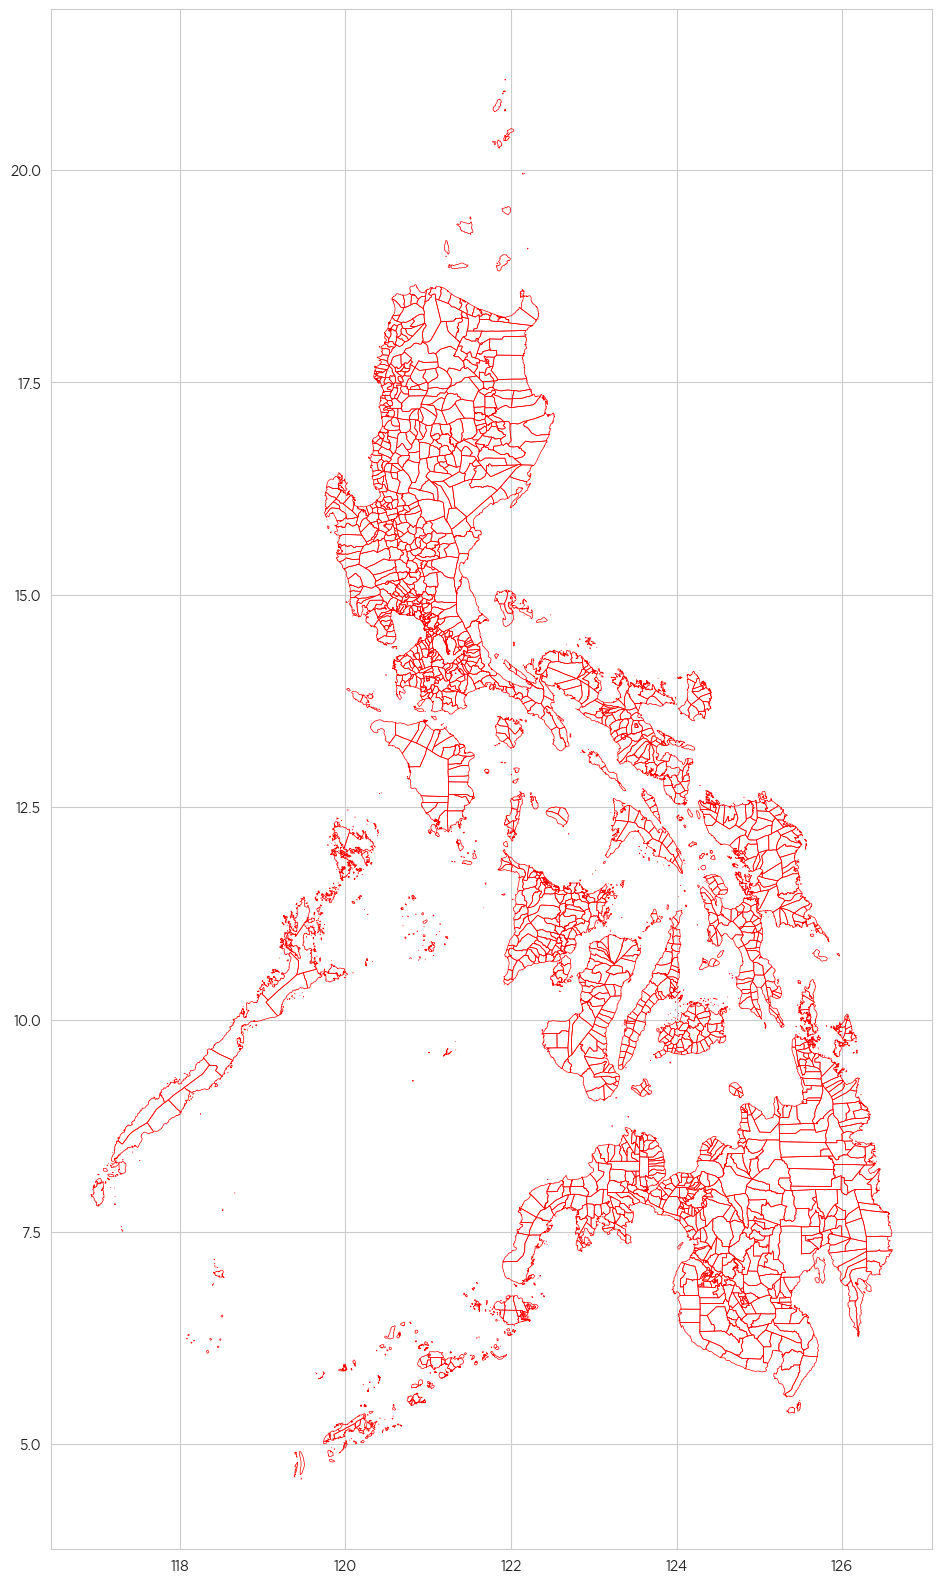

In [3]:
gdf_2.boundary.plot(figsize=(20,20), color='red',linewidth=0.5)

fl.fig_caption("Philippine Town Maps",
               "Map showing the Philippines broken down per municipality.")

#### Data Wrangling: Referendum Data

In [4]:
# Obtaining the data for the referendum
url = 'https://en.wikipedia.org/wiki/2008_Quezon_del_Sur_creation_plebiscite'

In [5]:
no2hati = pd.read_html(url)

##### General Vote Details

In [6]:
no2hatigen = no2hati[3]
display(no2hatigen)

fl.table_caption("Raw Referendum Data",
                 "Table showing the raw general details of the referendum/plebiscite.")

,Choice,Votes,%
0,No,205265,56.59
1,Yes,157457,43.41
2,Required majority,50.00,50.00
3,Valid votes,362722,99.53
4,Invalid or blank votes,1705,0.47
5,Total votes,364427,100.00
6,Registered voters/turnout,957199,37.89
7,Source: COMELEC report,Source: COMELEC report,Source: COMELEC report


In [7]:
no2hatigen_fil = no2hatigen.iloc[:2].copy()
no2hatigen_fil['Votes'] = no2hatigen_fil['Votes'].astype(float)

no2hatigen_fil = no2hatigen_fil.drop(columns=['%'])

total_votes = no2hatigen_fil['Votes'].sum()
no2hatigen_fil['%'] = ((no2hatigen_fil['Votes'] / total_votes) * 100).round(2)

print("\nNew DataFrame with selected rows and recomputed percentages:")
display(no2hatigen_fil)

fl.table_caption("Choice Table Data",
                 "Table showing the choices in plebiscite and their vote counts and shares.")


New DataFrame with selected rows and recomputed percentages:


,Choice,Votes,%
0,No,205265.0,56.59
1,Yes,157457.0,43.41


In [8]:
vote_details = no2hatigen.iloc[3:7].copy()
vote_details['Votes'] = vote_details['Votes'].astype(float)
vote_details['%'] = vote_details['%'].astype(float)

print("\nNew DataFrame with selected rows:")
display(vote_details)

fl.table_caption("Voter Demographics Data",
                 "Table showing the vote details of the plebiscite including the electoral population and turnout.")


New DataFrame with selected rows:


,Choice,Votes,%
3,Valid votes,362722.0,99.53
4,Invalid or blank votes,1705.0,0.47
5,Total votes,364427.0,100.00
6,Registered voters/turnout,957199.0,37.89


##### Votes per Municipality

In [9]:
no2hatimuni = no2hati[4]
display(no2hatimuni)

fl.table_caption("Municipalities Vote Data",
                 "Table showing the vote details of each choices in the plebiscite from each municipality/city.")

Administrative division                                           Yes  \
   Administrative division Administrative division.1               Total   
0                 Agdangan                  Agdangan                1150   
1                   Alabat                    Alabat                1610   
2                 Atimonan                  Atimonan                2593   
3               Buenavista                Buenavista                4067   
4                  Burdeos                   Burdeos                 382   
5                  Calauag                   Calauag                6851   
6               Candelaria                Candelaria                3463   
7                Catanauan                 Catanauan               10126   
8                  Dolores                   Dolores                 798   
9             General Luna              General Luna                4203   
10           General Nakar             General Nakar                1679   
11             Guinayangan               Guinayangan                6474   
12                  Gumaca                    Gumaca               12524   
13                 Infanta                   Infanta                2849   
14                 Jomalig                   Jomalig                 255   
15                   Lopez                     Lopez               10940   
16                  Lucban                    Lucban                2735   
17             Lucena City               Lucena City               14635   
18               Macalelon                 Macalelon                3363   
19                  Mauban                    Mauban                1085   
20                 Mulanay                   Mulanay                4129   
21            Padre Burgos              Padre Burgos                2339   
22                Pagbilao                  Pagbilao                5301   
23               Panukulan                 Panukulan                 724   
24             Patnanungan               Patnanungan                 336   
25                   Perez                     Perez                1083   
26                  Pitogo                    Pitogo                4353   
27                Plaridel                  Plaridel                1601   
28                 Polillo                   Polillo                 737   
29                  Quezon                    Quezon                2136   
30                    Real                      Real                1950   
31                Sampaloc                  Sampaloc                 411   
32              San Andres                San Andres                2866   
33             San Antonio               San Antonio                 867   
34           San Francisco             San Francisco                5754   
35             San Narciso               San Narciso                4646   
36                 Sariaya                   Sariaya                4713   
37              Tagkawayan                Tagkawayan                5510   
38                 Tayabas                   Tayabas                5517   
39                  Tiaong                    Tiaong                5573   
40                  Unisan                    Unisan                5129   
41                     NaN                       NaN                 NaN   
42                     NaN                    Quezon              157457   
43      Source: COMELEC[8]        Source: COMELEC[8]  Source: COMELEC[8]   

                                        No                      
                     %               Total                   %  
0                38.18                1862               61.82  
1                39.50                2466               60.50  
2                22.14                9121               77.86  
3                55.88                3211               44.12  
4                12.65                2637               87.35  
5                50.28                6776         

In [10]:
# Dropping all null values
no2hatimuni.dropna()

# Combining multi-index levels into one level
no2hatimuni.columns = [' '.join(col).strip() for col in no2hatimuni.columns.values]
no2hatimuni.columns = no2hatimuni.columns.str.replace(' ', '')

In [11]:
# Renaming columns
no2hatimuni = no2hatimuni.rename(columns={
    'AdministrativedivisionAdministrativedivision': 'Administrative division',
    'AdministrativedivisionAdministrativedivision.1': 'Administrative division 1',
    'YesTotal': 'Yes Votes',
    'Yes%': 'Yes %',
    'NoTotal': 'No Votes',
    'No%': 'No %'
})

In [12]:
no2hatimuni = no2hatimuni.drop(columns=['Administrative division 1'])
no2hatimuni = no2hatimuni.drop(index=[43])

In [13]:
no2hatimuni = no2hatimuni.dropna()

In [14]:
# Converting specific columns to float
columns_to_convert = ['Yes Votes', 'Yes %', 'No Votes', 'No %']
no2hatimuni[columns_to_convert] = no2hatimuni[columns_to_convert].astype(float)

In [15]:
# Creating additional dataframes each only containing votes and percentages of votes per jurisdiction
admin_div_columns = no2hatimuni.filter(like='Administrative division')

votes_columns = no2hatimuni.filter(like='Votes')
percentages_columns = no2hatimuni.filter(like='%')

votes_df = pd.concat([admin_div_columns, votes_columns], axis=1)

percentages_df = pd.concat([admin_div_columns, percentages_columns], axis=1)

In [16]:
print("Votes DataFrame:")
display(votes_df)

fl.table_caption("Municipalities Vote Count Data",
                 "Table showing only the vote counts of each choices in the plebiscite from each municipality/city.")

Votes DataFrame:


,Administrative division,Yes Votes,No Votes
0,Agdangan,1150.0,1862.0
1,Alabat,1610.0,2466.0
2,Atimonan,2593.0,9121.0
3,Buenavista,4067.0,3211.0
4,Burdeos,382.0,2637.0
5,Calauag,6851.0,6776.0
6,Candelaria,3463.0,10394.0
7,Catanauan,10126.0,5376.0
8,Dolores,798.0,2995.0
9,General Luna,4203.0,1688.0


In [17]:
print("\nPercentages DataFrame:")
display(percentages_df)

fl.table_caption("Municipalities Vote Share Data",
                 "Table showing only the vote percentages of each choices in the plebiscite from each municipality/city.")


Percentages DataFrame:


,Administrative division,Yes %,No %
0,Agdangan,38.18,61.82
1,Alabat,39.50,60.50
2,Atimonan,22.14,77.86
3,Buenavista,55.88,44.12
4,Burdeos,12.65,87.35
5,Calauag,50.28,49.72
6,Candelaria,24.99,75.01
7,Catanauan,65.32,34.68
8,Dolores,21.04,78.96
9,General Luna,71.35,28.65


##### Votes per Proposed Province

In [18]:
no2hatiprops = no2hati[5]
display(no2hatiprops)

fl.table_caption("Proposed Units Vote Count Data",
                 "Table showing the vote details of each choices in the plebiscite from each proposed province.")

Proposed province                           Yes               No       
  Proposed province Proposed province.1     Total      %     Total      %
0  Quezon del Norte    Quezon del Norte   54010.0  29.97  126202.0  70.03
1    Quezon del Sur      Quezon del Sur  103447.0  56.68   79063.0  43.32
2               NaN                 NaN       NaN    NaN       NaN    NaN
3               NaN              Quezon  157457.0  43.41  205265.0  56.59

In [19]:
# Combining multi-index levels into one level
no2hatiprops.columns = [' '.join(col).strip() for col in no2hatiprops.columns.values]
no2hatiprops.columns = no2hatiprops.columns.str.replace(' ', '')

In [20]:
# Renaming columns
no2hatiprops = no2hatiprops.rename(columns={
    'ProposedprovinceProposedprovince': 'Proposed Province',
    'ProposedprovinceProposedprovince.1': 'Proposed Province 1',
    'YesTotal': 'Yes Votes',
    'Yes%': 'Yes %',
    'NoTotal': 'No Votes',
    'No%': 'No %'
})

In [21]:
# Removing empty values in the dataframe
no2hatiprops = no2hatiprops.drop(columns=['Proposed Province 1'])
no2hatiprops = no2hatiprops.drop(index=[3])
no2hatiprops = no2hatiprops.dropna()

In [22]:
# Creating additional dataframes each only containing votes and percentages of votes per jurisdiction
admin_div_columns = no2hatiprops.filter(like='Proposed Province')

votes_columns = no2hatiprops.filter(like='Votes')
percentages_columns = no2hatiprops.filter(like='%')

propvotes_df = pd.concat([admin_div_columns, votes_columns], axis=1)
proppercentages_df = pd.concat([admin_div_columns, percentages_columns], axis=1)

#### Data Wrangling: Geospatial/Maps Data

In [23]:
# Reading the maps data of the Philippines
# Names like Quezon are common in other areas, so GID_2 is used in filtering the data since each province has unique identifiers.

gdf_que = gdf_2[gdf_2['GID_1'] == 'PHL.62_1'].copy()
display(gdf_que)

fl.table_caption("Quezon Province Map Data",
                 "Table showing the unique map details of each jurisdiction of Quezon Province.")

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
1296,PHL.62.1_1,PHL,Philippines,PHL.62_1,Quezon,NA,Agdangan,NA,NA,Bayan|Munisipyo,Municipality,45601,PH.QZ.AD,"MULTIPOLYGON (((121.91780 13.85410, 121.90510 ..."
1297,PHL.62.2_1,PHL,Philippines,PHL.62_1,Quezon,NA,Alabat,NA,NA,Bayan|Munisipyo,Municipality,45602,PH.QZ.AA,"MULTIPOLYGON (((122.06690 14.06150, 122.06080 ..."
1298,PHL.62.3_1,PHL,Philippines,PHL.62_1,Quezon,NA,Atimonan,NA,NA,Bayan|Munisipyo,Municipality,45603,PH.QZ.AI,"MULTIPOLYGON (((122.02100 13.91930, 122.03200 ..."
1299,PHL.62.4_1,PHL,Philippines,PHL.62_1,Quezon,NA,Buenavista,NA,NA,Bayan|Munisipyo,Municipality,45605,PH.QZ.BE,"MULTIPOLYGON (((122.49000 13.68530, 122.49570 ..."
1300,PHL.62.5_1,PHL,Philippines,PHL.62_1,Quezon,NA,Burdeos,NA,NA,Bayan|Munisipyo,Municipality,45606,PH.QZ.BR,"MULTIPOLYGON (((122.01930 14.80550, 122.02320 ..."
1301,PHL.62.6_1,PHL,Philippines,PHL.62_1,Quezon,NA,Calauag,NA,NA,Bayan|Munisipyo,Municipality,45607,PH.QZ.CL,"MULTIPOLYGON (((122.37720 13.89550, 122.33540 ..."
1302,PHL.62.7_1,PHL,Philippines,PHL.62_1,Quezon,NA,Candelaria,NA,NA,Bayan|Munisipyo,Municipality,45608,PH.QZ.CN,"MULTIPOLYGON (((121.40940 13.84510, 121.40970 ..."
1303,PHL.62.8_1,PHL,Philippines,PHL.62_1,Quezon,NA,Catanauan,NA,NA,Bayan|Munisipyo,Municipality,45610,PH.QZ.CT,"MULTIPOLYGON (((122.34850 13.54960, 122.33090 ..."
1304,PHL.62.9_1,PHL,Philippines,PHL.62_1,Quezon,NA,Dolores,NA,NA,Bayan|Munisipyo,Municipality,45615,PH.QZ.DL,"MULTIPOLYGON (((121.38370 13.97870, 121.33810 ..."
1305,PHL.62.10_1,PHL,Philippines,PHL.62_1,Quezon,NA,GeneralLuna,NA,NA,Bayan|Munisipyo,Municipality,45616,PH.QZ.GL,"MULTIPOLYGON (((122.20110 13.63330, 122.20250 ..."


In [24]:
# There are 42 towns/cities in the list, but officially there are only 41.
# The multipolygon details of 'Hinunangan' seems quite far from other towns in Quezon, which mostly range from 121-122, but Hinunangan is at 125.
gdf_que2 = gdf_que[~gdf_que['NAME_2'].str.contains('Hinunangan')].copy()
gdf_que2 = gdf_que2[['GID_2', 'NAME_2', 'geometry']].copy()

In [25]:
# Resetting the index of gdf_que2 to be able to be merged from another dataset
gdf_que2_res = gdf_que2.reset_index(drop=True)

In [26]:
# Merging the dataframes without specifying a common column
merged_df = pd.concat([no2hatimuni, gdf_que2_res], axis=1).copy()

# Rearranging the columns
merged_df = merged_df[['GID_2', 'NAME_2', 'Administrative division', 'Yes Votes', 'No Votes', 'Yes %', 'No %', 'geometry']]

# Removing the 'City' word in 'Administrative division' column
merged_df['Administrative division'] = merged_df['Administrative division'].str.replace(' City', '')

display(merged_df)
fl.table_caption("Merged Data",
                 "Table showing the combined vote details of each choices in the plebiscite and map details from each municipality/city.")

,GID_2,NAME_2,Administrative division,Yes Votes,No Votes,Yes %,No %,geometry
0,PHL.62.1_1,Agdangan,Agdangan,1150.0,1862.0,38.18,61.82,"MULTIPOLYGON (((121.91780 13.85410, 121.90510 ..."
1,PHL.62.2_1,Alabat,Alabat,1610.0,2466.0,39.50,60.50,"MULTIPOLYGON (((122.06690 14.06150, 122.06080 ..."
2,PHL.62.3_1,Atimonan,Atimonan,2593.0,9121.0,22.14,77.86,"MULTIPOLYGON (((122.02100 13.91930, 122.03200 ..."
3,PHL.62.4_1,Buenavista,Buenavista,4067.0,3211.0,55.88,44.12,"MULTIPOLYGON (((122.49000 13.68530, 122.49570 ..."
4,PHL.62.5_1,Burdeos,Burdeos,382.0,2637.0,12.65,87.35,"MULTIPOLYGON (((122.01930 14.80550, 122.02320 ..."
5,PHL.62.6_1,Calauag,Calauag,6851.0,6776.0,50.28,49.72,"MULTIPOLYGON (((122.37720 13.89550, 122.33540 ..."
6,PHL.62.7_1,Candelaria,Candelaria,3463.0,10394.0,24.99,75.01,"MULTIPOLYGON (((121.40940 13.84510, 121.40970 ..."
7,PHL.62.8_1,Catanauan,Catanauan,10126.0,5376.0,65.32,34.68,"MULTIPOLYGON (((122.34850 13.54960, 122.33090 ..."
8,PHL.62.9_1,Dolores,Dolores,798.0,2995.0,21.04,78.96,"MULTIPOLYGON (((121.38370 13.97870, 121.33810 ..."
9,PHL.62.10_1,GeneralLuna,General Luna,4203.0,1688.0,71.35,28.65,"MULTIPOLYGON (((122.20110 13.63330, 122.20250 ..."


In [27]:
# Creating a new column containing which provinces each units would be part of if referendum is approved

proposed_province_mapping = {
    'Agdangan': 'Quezon del Sur',
    'Alabat': 'Quezon del Sur',
    'Atimonan': 'Quezon del Sur',
    'Buenavista': 'Quezon del Sur',
    'Burdeos': 'Quezon del Norte',
    'Calauag': 'Quezon del Sur',
    'Candelaria': 'Quezon del Norte',
    'Catanauan': 'Quezon del Sur',
    'Dolores': 'Quezon del Norte',
    'General Luna': 'Quezon del Sur',
    'General Nakar': 'Quezon del Norte',
    'Guinayangan': 'Quezon del Sur',
    'Gumaca': 'Quezon del Sur',
    'Infanta': 'Quezon del Norte',
    'Jomalig': 'Quezon del Norte',
    'Lopez': 'Quezon del Sur',
    'Lucban': 'Quezon del Norte',
    'Lucena': 'Quezon del Norte',
    'Macalelon': 'Quezon del Sur',
    'Mauban': 'Quezon del Norte',
    'Mulanay': 'Quezon del Sur',
    'Padre Burgos': 'Quezon del Sur',
    'Pagbilao': 'Quezon del Norte',
    'Panukulan': 'Quezon del Norte',
    'Patnanungan': 'Quezon del Norte',
    'Perez': 'Quezon del Sur',
    'Plaridel': 'Quezon del Sur',
    'Pitogo': 'Quezon del Sur',
    'Polillo': 'Quezon del Norte',
    'Quezon': 'Quezon del Sur',
    'Real': 'Quezon del Norte',
    'Sampaloc': 'Quezon del Norte',
    'San Andres': 'Quezon del Sur',
    'San Antonio': 'Quezon del Norte',
    'San Francisco': 'Quezon del Sur',
    'San Narciso': 'Quezon del Sur',
    'Sariaya': 'Quezon del Norte',
    'Tagkawayan': 'Quezon del Sur',
    'Tayabas': 'Quezon del Norte',
    'Tiaong': 'Quezon del Norte',
    'Unisan': 'Quezon del Sur'
    }

merged_df['Proposed Province'] = merged_df['Administrative division'].map(proposed_province_mapping).fillna('Unknown')
display(merged_df)

fl.table_caption("Merged Data with Additional Column",
                 "Table showing the merged data from each municipality/city, but also including the proposed province of which each municipality/city would be part of if approved.")

,GID_2,NAME_2,Administrative division,Yes Votes,No Votes,Yes %,No %,geometry,Proposed Province
0,PHL.62.1_1,Agdangan,Agdangan,1150.0,1862.0,38.18,61.82,"MULTIPOLYGON (((121.91780 13.85410, 121.90510 ...",Quezon del Sur
1,PHL.62.2_1,Alabat,Alabat,1610.0,2466.0,39.50,60.50,"MULTIPOLYGON (((122.06690 14.06150, 122.06080 ...",Quezon del Sur
2,PHL.62.3_1,Atimonan,Atimonan,2593.0,9121.0,22.14,77.86,"MULTIPOLYGON (((122.02100 13.91930, 122.03200 ...",Quezon del Sur
3,PHL.62.4_1,Buenavista,Buenavista,4067.0,3211.0,55.88,44.12,"MULTIPOLYGON (((122.49000 13.68530, 122.49570 ...",Quezon del Sur
4,PHL.62.5_1,Burdeos,Burdeos,382.0,2637.0,12.65,87.35,"MULTIPOLYGON (((122.01930 14.80550, 122.02320 ...",Quezon del Norte
5,PHL.62.6_1,Calauag,Calauag,6851.0,6776.0,50.28,49.72,"MULTIPOLYGON (((122.37720 13.89550, 122.33540 ...",Quezon del Sur
6,PHL.62.7_1,Candelaria,Candelaria,3463.0,10394.0,24.99,75.01,"MULTIPOLYGON (((121.40940 13.84510, 121.40970 ...",Quezon del Norte
7,PHL.62.8_1,Catanauan,Catanauan,10126.0,5376.0,65.32,34.68,"MULTIPOLYGON (((122.34850 13.54960, 122.33090 ...",Quezon del Sur
8,PHL.62.9_1,Dolores,Dolores,798.0,2995.0,21.04,78.96,"MULTIPOLYGON (((121.38370 13.97870, 121.33810 ...",Quezon del Norte
9,PHL.62.10_1,GeneralLuna,General Luna,4203.0,1688.0,71.35,28.65,"MULTIPOLYGON (((122.20110 13.63330, 122.20250 ...",Quezon del Sur


In [28]:
# Creating a new DataFrame with province, geometry, vote shares, and the geometry
town_share_df = merged_df

town_share_df['Winner'] = town_share_df[['Yes %', 'No %']].idxmax(axis=1)
town_share_df['Winner Share'] = town_share_df[['Yes %', 'No %']].max(axis=1)

town_share_df = town_share_df[['NAME_2', 'Administrative division', 'Yes %', 'No %', 'Winner', 'Winner Share', 'geometry']]

#### Visualizing the Votes

In [29]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)

# Setting the font of visuals into Gotham
plt.rcParams['font.family'] = 'Gotham'

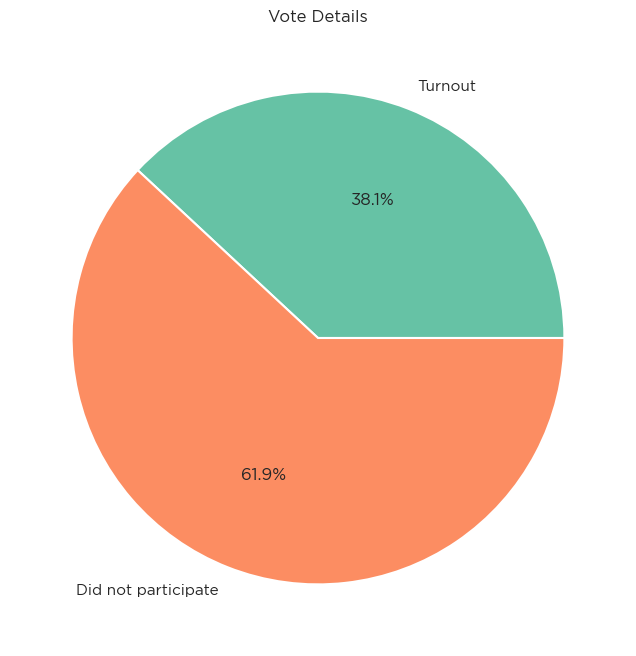

In [30]:
total_votes = vote_details[vote_details['Choice'] == 'Total votes']['Votes'].iloc[0]
registered_voters = vote_details[vote_details['Choice'] == 'Registered voters/turnout']['Votes'].iloc[0]
turnout_percentage = ((total_votes / registered_voters) * 100).round(2)
non_voters_percentage = 100 - turnout_percentage

percentage_data = pd.DataFrame({
    'Choice': ['Turnout', 'Did not participate'],
    'Votes': [turnout_percentage, non_voters_percentage]
})

plt.figure(figsize=(8, 8))
sns.set_palette("Set2")

plt.pie(percentage_data['Votes'], labels=percentage_data['Choice'], autopct='%1.1f%%',
        wedgeprops=dict(edgecolor='white', linewidth=1.5))

plt.title('Vote Details')
plt.savefig('piechart.png', dpi=600)
plt.show()

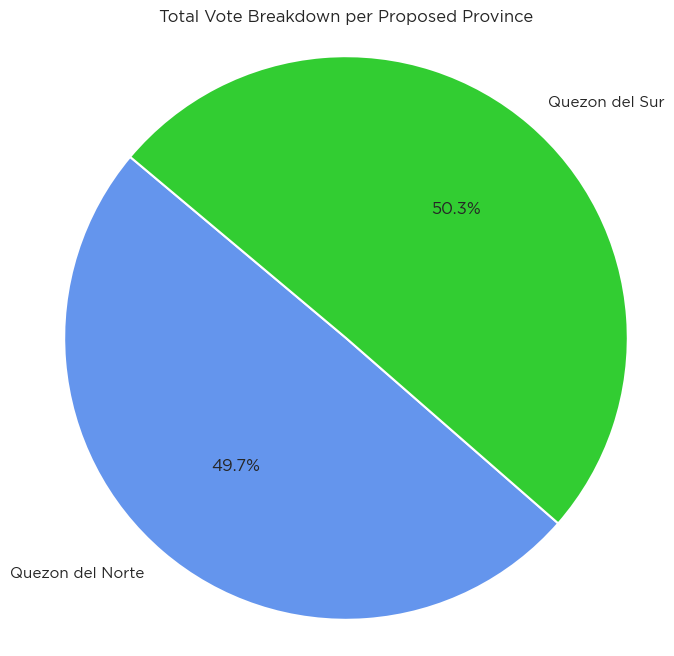

In [31]:
plt.figure(figsize=(8, 8))
colors = ['cornflowerblue', 'limegreen']
sns.set_palette(sns.color_palette(colors))

propvotes_df['Total Votes'] = propvotes_df['Yes Votes'] + propvotes_df['No Votes']
total_votes_per_province = propvotes_df.groupby('Proposed Province')['Total Votes'].sum().reset_index()

custom_labels = ['Quezon del Norte', 'Quezon del Sur']

plt.pie(total_votes_per_province['Total Votes'], labels=custom_labels, autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(edgecolor='white', linewidth=1.5))

plt.title('Total Vote Breakdown per Proposed Province')
plt.axis('equal')
plt.savefig('piechart1.png', dpi=600)

plt.show()

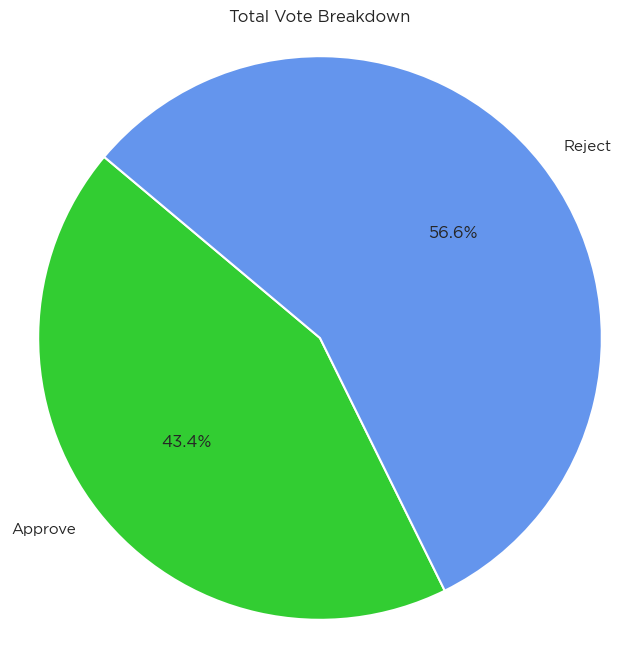

In [32]:
# Calculate the sum of Yes Votes and No Votes separately
total_yes_votes = propvotes_df['Yes Votes'].sum()
total_no_votes = propvotes_df['No Votes'].sum()

# Define custom colors
colors = ['limegreen', 'cornflowerblue']

# Create a DataFrame for Yes and No votes
votes_data = pd.DataFrame({'Vote Type': ['Yes', 'No'], 'Total Votes': [total_yes_votes, total_no_votes]})

custom_labels = ['Approve', 'Reject']

plt.figure(figsize=(8, 8))
sns.set_palette(sns.color_palette(colors))

plt.pie(votes_data['Total Votes'], labels=custom_labels, autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(edgecolor='white', linewidth=1.5))

plt.title('Total Vote Breakdown')
plt.axis('equal')
plt.savefig('piechart2.png', dpi=600)

plt.show()

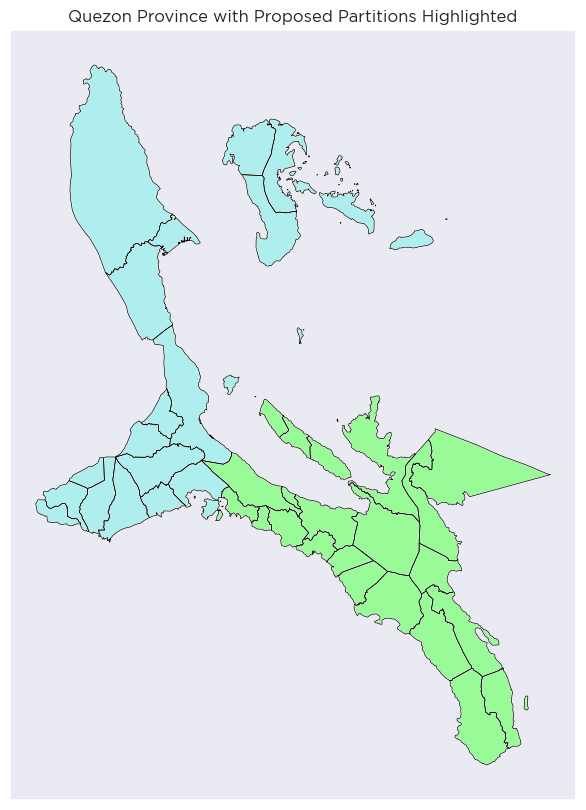

In [33]:
# Load the entire map of Quezon province
quezon_map = gpd.read_file(r"C:\Users\Ebo\DS162\Data-Vis\Trial_maps\quezonmap.json")

# Load the file containing Quezon del Norte
quezon_del_norte = gpd.read_file(r"C:\Users\Ebo\DS162\Data-Vis\Trial_maps\quedelnor.json")

# Load the file containing Quezon del Sur
quezon_del_sur = gpd.read_file(r"C:\Users\Ebo\DS162\Data-Vis\Trial_maps\quedelsur.json")

# Plot the entire map of Quezon province
quezon_map.boundary.plot(figsize=(10, 10), edgecolor='black', linewidth=0.5)

# Plot Quezon del Norte
quezon_del_norte.plot(ax=plt.gca(), color='paleturquoise', legend=True)

# Plot Quezon del Sur
quezon_del_sur.plot(ax=plt.gca(), color='palegreen', legend=True)

plt.xticks([])
plt.yticks([])
plt.title("Quezon Province with Proposed Partitions Highlighted")
plt.savefig('quezonpartedmap.png', dpi=600)

plt.show()

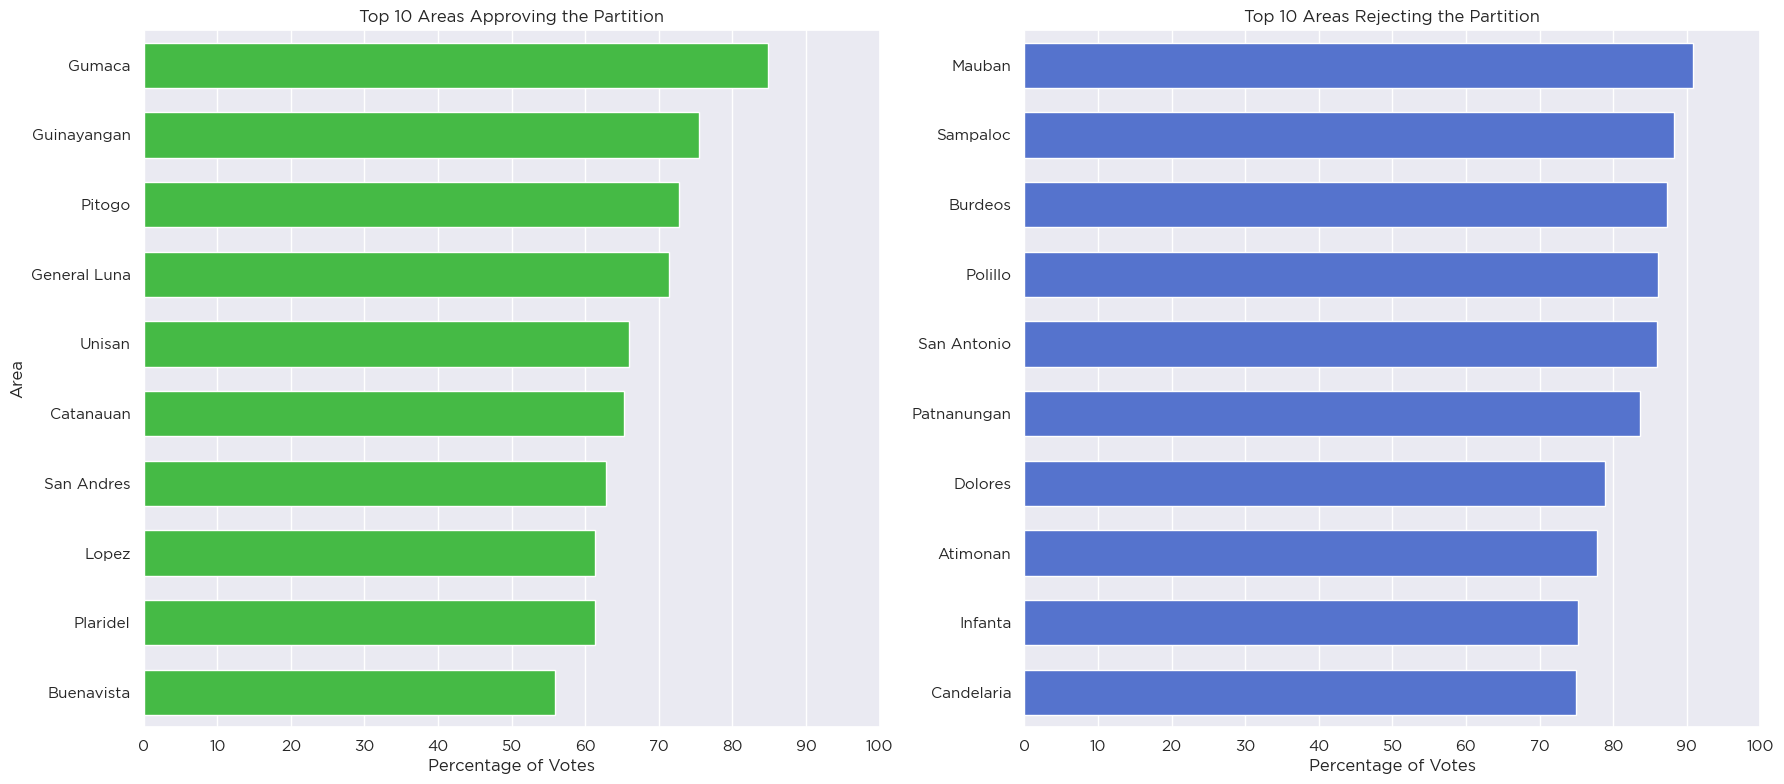

In [34]:
top_10_yes = merged_df.sort_values(by='Yes %', ascending=False).head(10)
top_10_no = merged_df.sort_values(by='No %', ascending=False).head(10)

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plotting top 10 towns with the highest Yes votes
sns.barplot(x='Yes %', y='Administrative division', data=top_10_yes, ax=axs[0], color='limegreen', width=0.65)
axs[0].set_title('Top 10 Areas Approving the Partition')
axs[0].set_xlabel('Percentage of Votes')
axs[0].set_ylabel('Area')
axs[0].set_xlim(0, 100)

axs[0].set_xticks(range(0, 101, 10))
axs[0].set_xticklabels([str(i) for i in range(0, 101, 10)])
axs[0].set_yticklabels(top_10_yes['Administrative division'])

# Plotting top 10 towns with the highest No votes
sns.barplot(x='No %', y='Administrative division', data=top_10_no, ax=axs[1], color='royalblue', width=0.65)
axs[1].set_title('Top 10 Areas Rejecting the Partition')
axs[1].set_xlabel('Percentage of Votes')
axs[1].set_xlim(0, 100)
axs[1].set_ylabel('')

axs[1].set_xticks(range(0, 101, 10))
axs[1].set_xticklabels([str(i) for i in range(0, 101, 10)])
axs[1].set_yticklabels(top_10_no['Administrative division'])

plt.savefig('yes_and_no_top10que.png', bbox_inches='tight', pad_inches=0.125, dpi=600)

plt.tight_layout()
plt.show()

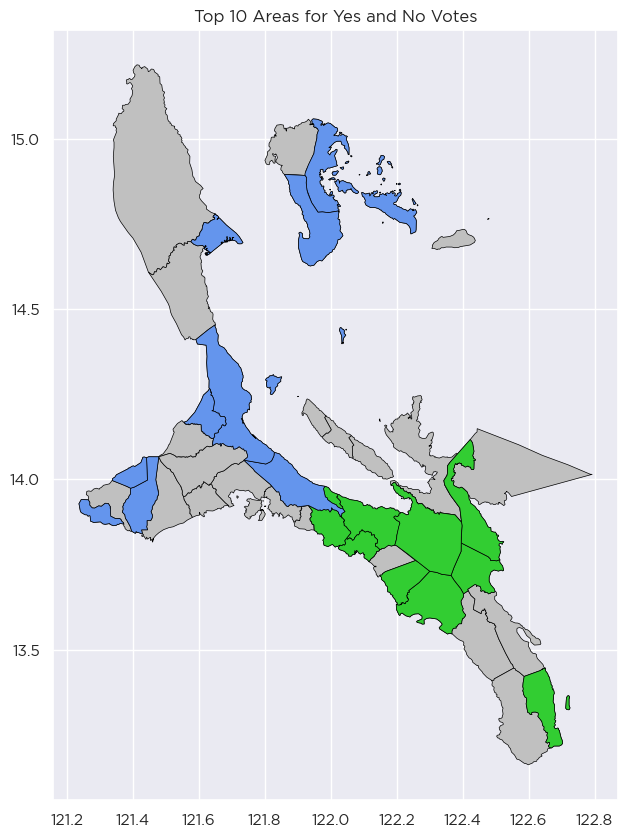

In [35]:
gdf = gpd.GeoDataFrame(merged_df)
top_10_areas = gdf[(gdf['Administrative division'].isin(top_10_yes['Administrative division'])) | (gdf['Administrative division'].isin(top_10_no['Administrative division']))]

gdf.plot(figsize=(10, 10), edgecolor='black', linewidth=0.5, color='silver')

top_10_areas[top_10_areas['Administrative division'].isin(top_10_yes['Administrative division'])].plot(ax=plt.gca(),
                                                                                                       color='limegreen',
                                                                                                       edgecolor='black',
                                                                                                       linewidth=0.5,
                                                                                                       legend=True)

top_10_areas[top_10_areas['Administrative division'].isin(top_10_no['Administrative division'])].plot(ax=plt.gca(),
                                                                                                      color='cornflowerblue',
                                                                                                      edgecolor='black',
                                                                                                      linewidth=0.5,
                                                                                                      legend=True)

plt.title("Top 10 Areas for Yes and No Votes")
plt.savefig('top_10_areas_map.png', bbox_inches='tight', pad_inches=0.125, dpi=300)

plt.show()

In [36]:
# Creating separate datasets dedicated for proposed provinces
merged_dfnor = merged_df[merged_df['Proposed Province'] == 'Quezon del Norte'].copy()
merged_dfsur = merged_df[merged_df['Proposed Province'] == 'Quezon del Sur'].copy()

plt.rcParams['font.family'] = 'Gotham'

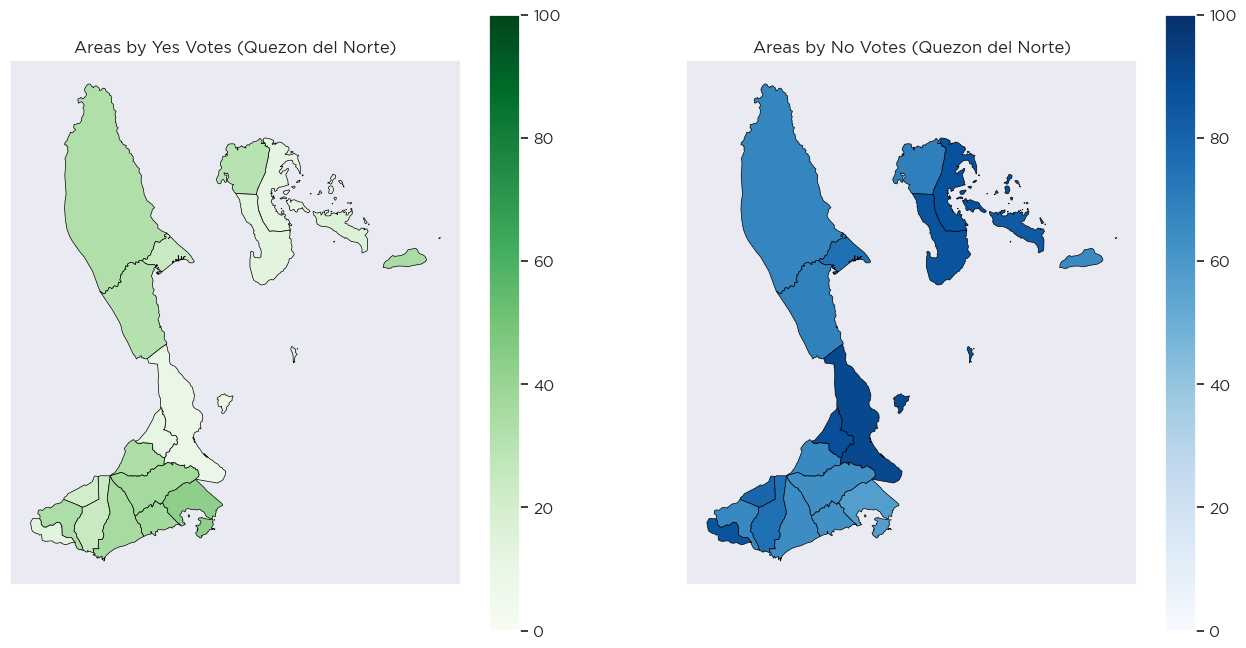

In [37]:
# Plotting the map (for Quezon del Norte)
gdf = gpd.GeoDataFrame(merged_dfnor)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
gdf.plot(column='Yes %', ax=axs[0], cmap='Greens', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[0].set_title("Areas by Yes Votes (Quezon del Norte)")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Manually customizing colorbar for the first plot
sm1 = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=100))
sm1._A = []
cbar1 = fig.colorbar(sm1, ax=axs[0], orientation='vertical')
cbar1.set_ticks([0, 20, 40, 60, 80, 100])

gdf.plot(column='No %', ax=axs[1], cmap='Blues', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[1].set_title("Areas by No Votes (Quezon del Norte)")
axs[1].set_xticks([])
axs[1].set_yticks([])

# Manually customizing colorbar for the second plot
sm2 = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=100))
sm2._A = []
cbar2 = fig.colorbar(sm2, ax=axs[1], orientation='vertical')
cbar2.set_ticks([0, 20, 40, 60, 80, 100])

# Save the plot
plt.savefig('yesandnovotesqdn.png', bbox_inches='tight', pad_inches=0.125, dpi=600)
plt.show()

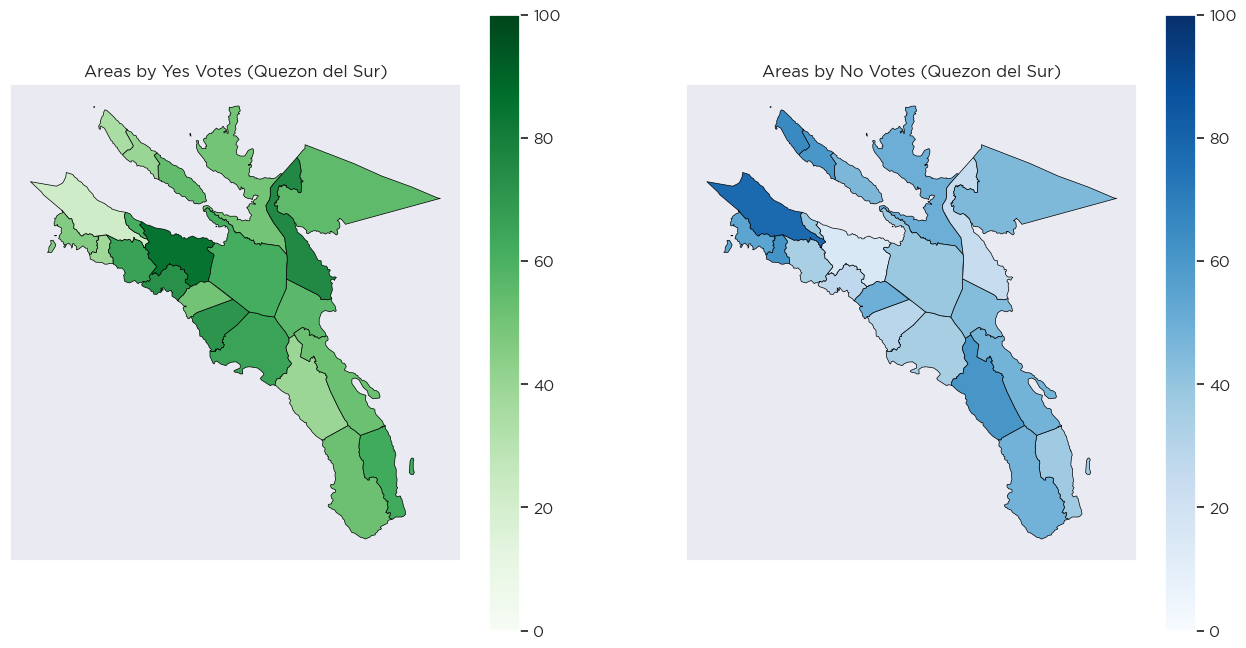

In [38]:
# Plotting the map (for Quezon del Sur)
gdf = gpd.GeoDataFrame(merged_dfsur)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
gdf.plot(column='Yes %', ax=axs[0], cmap='Greens', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[0].set_title("Areas by Yes Votes (Quezon del Sur)")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Manually customizing colorbar for the first plot
sm1 = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=100))
sm1._A = []
cbar1 = fig.colorbar(sm1, ax=axs[0], orientation='vertical')
cbar1.set_ticks([0, 20, 40, 60, 80, 100])

gdf.plot(column='No %', ax=axs[1], cmap='Blues', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[1].set_title("Areas by No Votes (Quezon del Sur)")
axs[1].set_xticks([])
axs[1].set_yticks([])

# Manually customizing colorbar for the second plot
sm2 = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=100))
sm2._A = []
cbar2 = fig.colorbar(sm2, ax=axs[1], orientation='vertical')
cbar2.set_ticks([0, 20, 40, 60, 80, 100])

# Save the plot
plt.savefig('yesandnovotesqds.png', bbox_inches='tight', pad_inches=0.125, dpi=600)
plt.show()

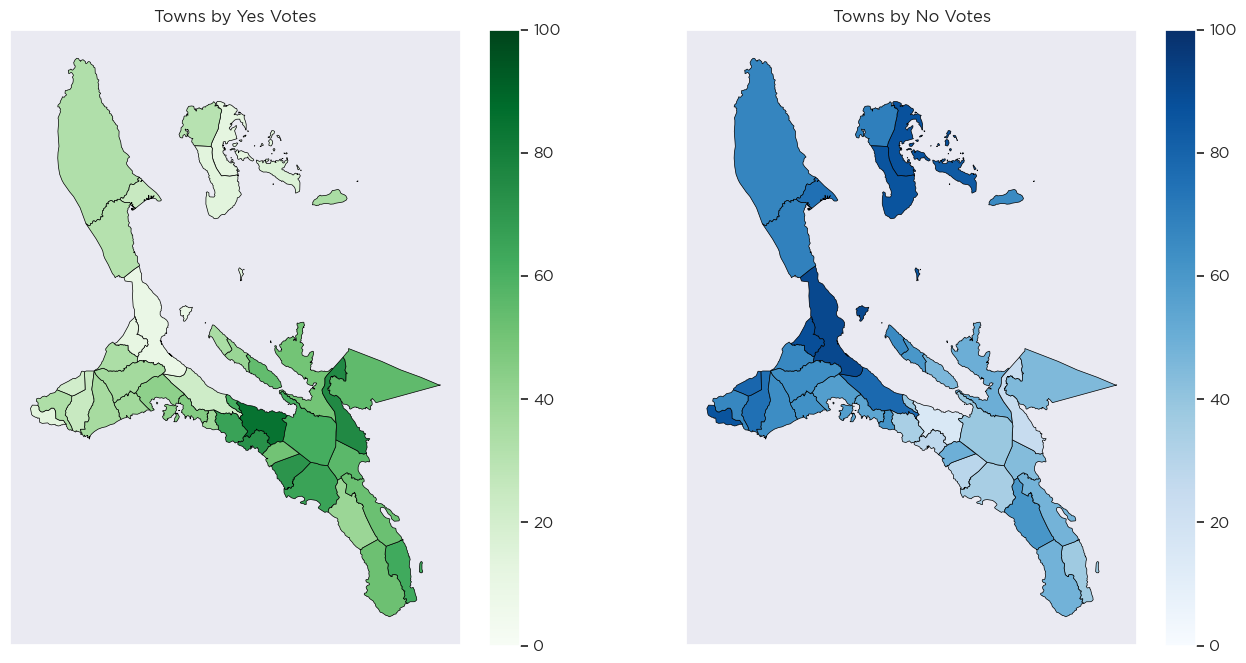

In [39]:
# Plotting the map (for Quezon as a whole)
gdf = gpd.GeoDataFrame(merged_df)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
gdf.plot(column='Yes %', ax=axs[0], cmap='Greens', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[0].set_title("Towns by Yes Votes")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Manually customizing colorbar for the first plot
sm1 = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=100))
sm1._A = []
cbar1 = fig.colorbar(sm1, ax=axs[0], orientation='vertical')
cbar1.set_ticks([0, 20, 40, 60, 80, 100])

gdf.plot(column='No %', ax=axs[1], cmap='Blues', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[1].set_title("Towns by No Votes")
axs[1].set_xticks([])
axs[1].set_yticks([])

# Manually customizing colorbar for the second plot
sm2 = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=100))
sm2._A = []
cbar2 = fig.colorbar(sm2, ax=axs[1], orientation='vertical')
cbar2.set_ticks([0, 20, 40, 60, 80, 100])

# Save the plot
plt.savefig('yesandnovotesq.png', bbox_inches='tight', pad_inches=0.125, dpi=600)
plt.show()

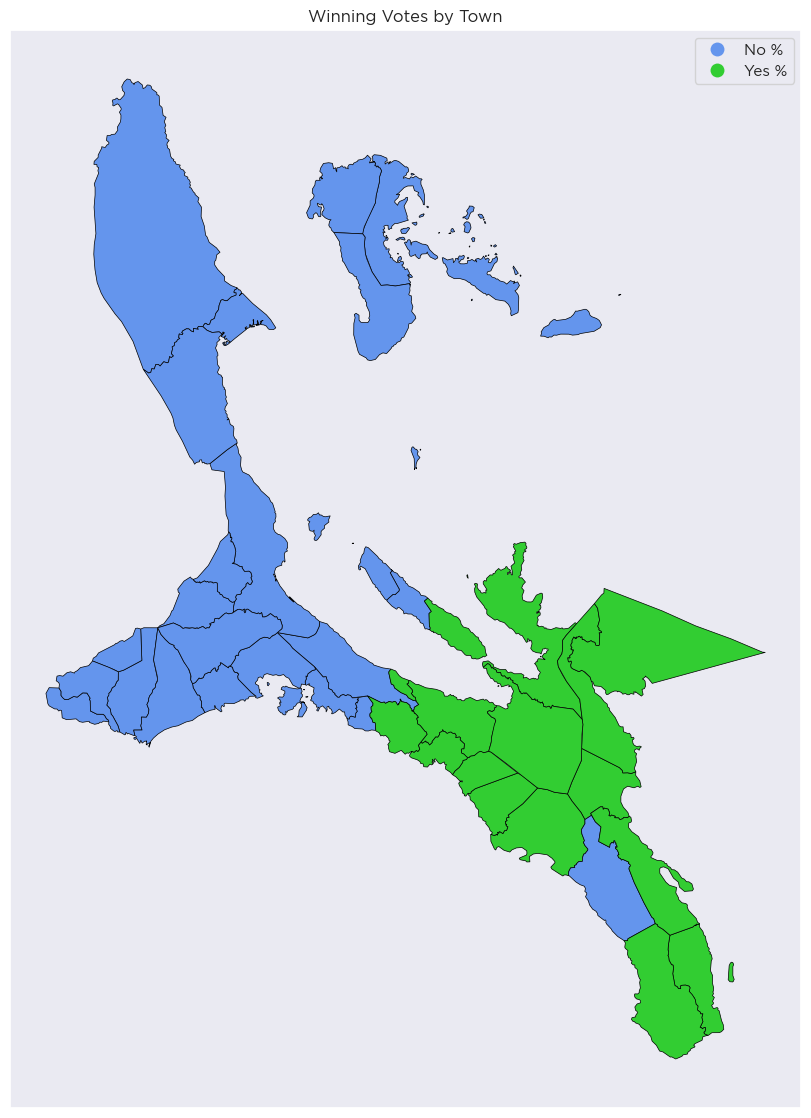

In [40]:
gdf = gpd.GeoDataFrame(town_share_df)

# Define colors for each candidate with 'Share' included in every next candidate
colors = {'Yes %': 'limegreen', 'No %': 'cornflowerblue'}

# Create a custom colormap based on the colors dictionary
cmap = ListedColormap([colors[share] for share in town_share_df['Winner'].unique()])

# Plot the GeoDataFrame shading each province according to the winner's share of votes
fig, ax = plt.subplots(figsize=(14, 14))
gdf.plot(column='Winner', cmap=cmap, edgecolor='black', linewidth=0.5, legend=True, ax=ax)

# Add labels, titles, etc. as needed
ax.set_title("Winning Votes by Town")

plt.xticks([])
plt.yticks([])

plt.savefig('quezon_referendum_winner_map.png', bbox_inches='tight', pad_inches=0.125, dpi=300)

# Show the plot
plt.show()

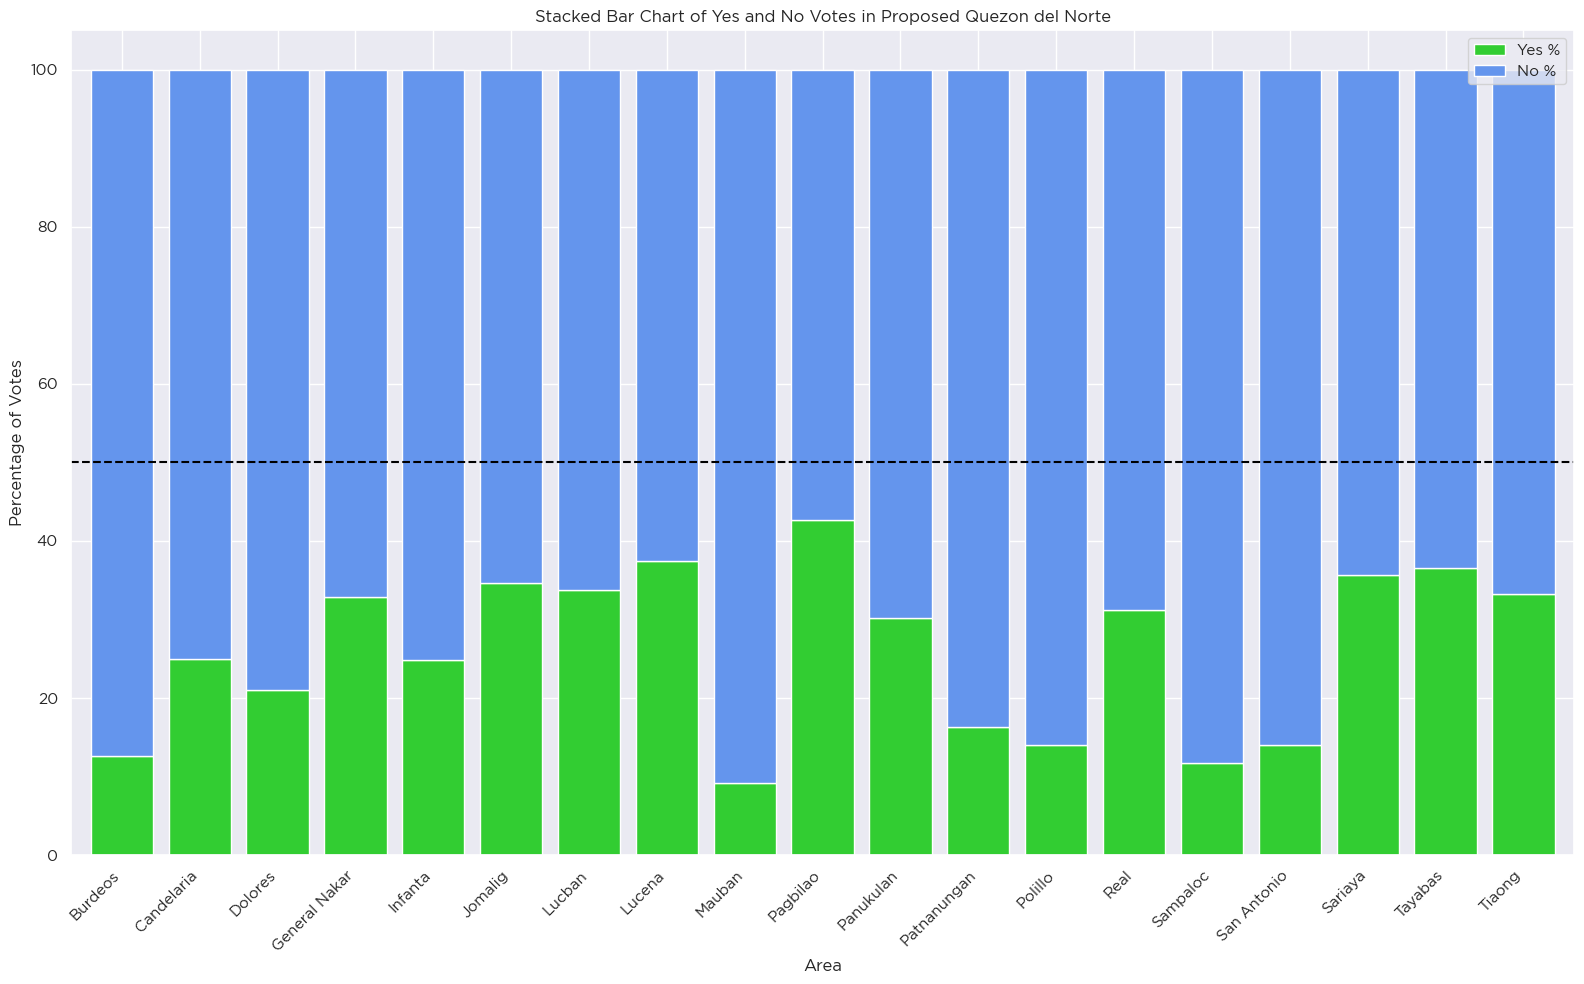

In [41]:
data = pd.DataFrame({
    'Yes %': merged_dfnor['Yes %'],
    'No %': merged_dfnor['No %']
})

ax = data.plot(kind='bar', stacked=True, width=0.8, figsize=(16, 10), color=['limegreen', 'cornflowerblue'])

plt.title('Stacked Bar Chart of Yes and No Votes in Proposed Quezon del Norte')
plt.xlabel('Area')
plt.ylabel('Percentage of Votes')

ax.set_xticklabels(merged_dfnor['Administrative division'], rotation=45, ha='right')

plt.axhline(y=50, color='black', linestyle='--', linewidth=1.5)

plt.legend(loc='upper right')
plt.tight_layout()

plt.show()


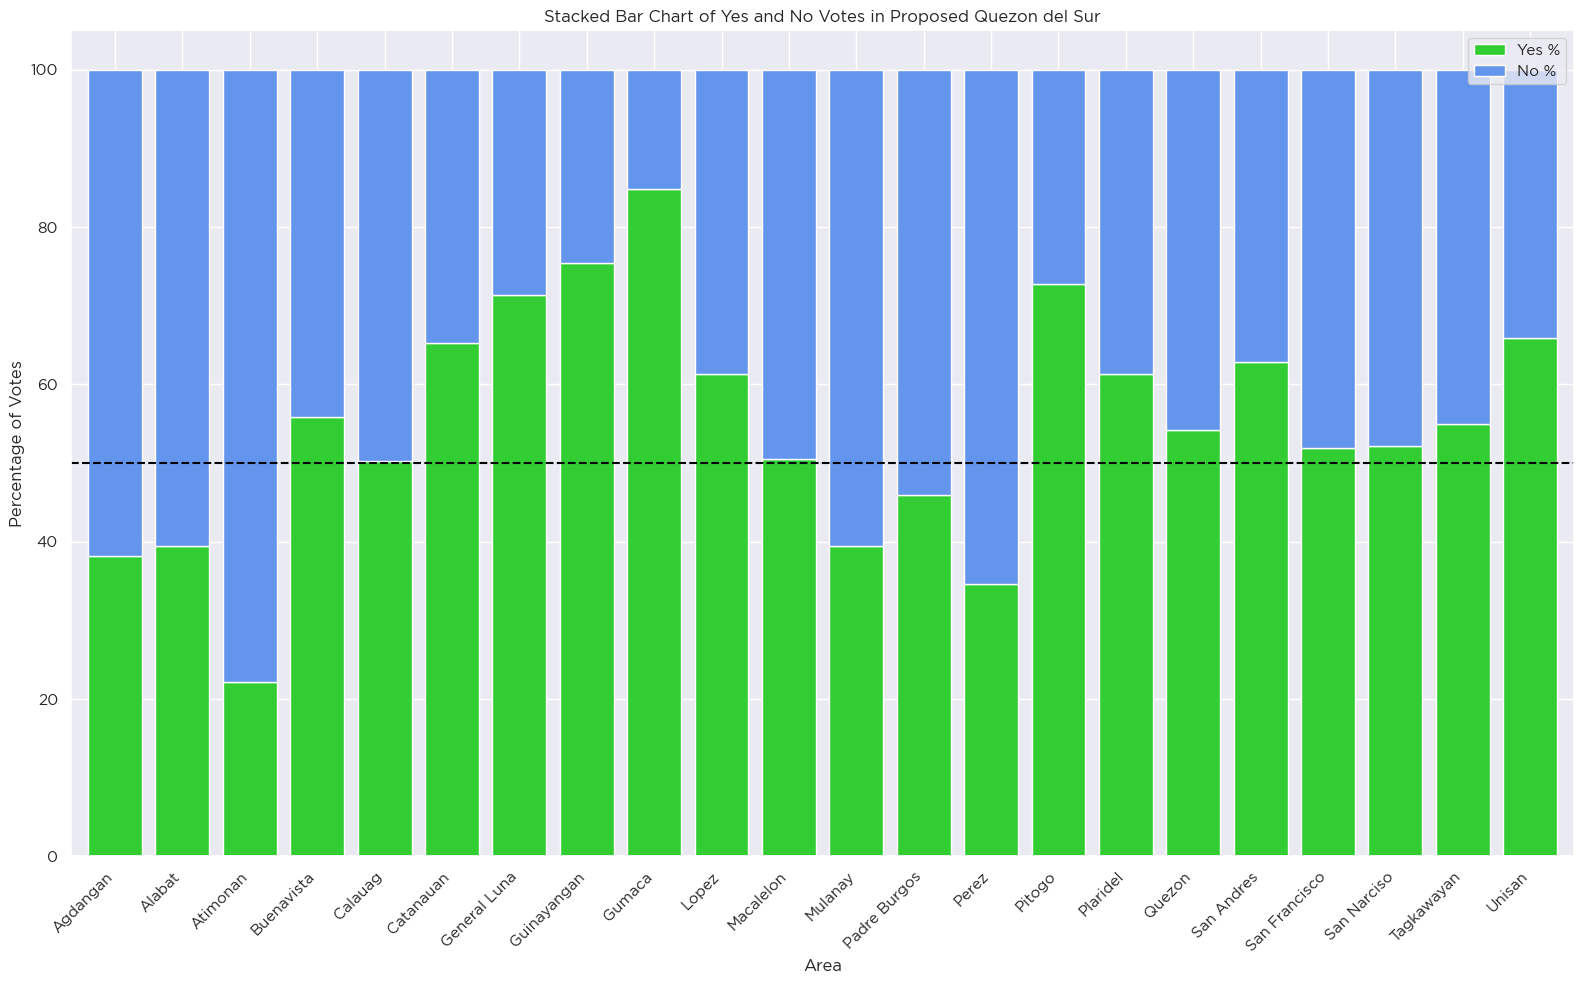

In [42]:
data = pd.DataFrame({
    'Yes %': merged_dfsur['Yes %'],
    'No %': merged_dfsur['No %']
})

ax = data.plot(kind='bar', stacked=True, width=0.8, figsize=(16, 10), color=['limegreen', 'cornflowerblue'])

plt.title('Stacked Bar Chart of Yes and No Votes in Proposed Quezon del Sur')
plt.xlabel('Area')
plt.ylabel('Percentage of Votes')

ax.set_xticklabels(merged_dfsur['Administrative division'], rotation=45, ha='right')

plt.axhline(y=50, color='black', linestyle='--', linewidth=1.5)

plt.legend(loc='upper right')
plt.tight_layout()

plt.show()
